# Labeled Wafer Images

In [29]:
import os
import numpy as np
import pandas as pd
import cv2 as cv
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D

In [2]:
def fix_layout(width:int=95):
    from IPython.core.display import display, HTML
    display(HTML('<style>.container { width:' + str(width) + '% !important; }</style>'))

fix_layout()

## Silicon Wafer 1

### Load Data

In [3]:
# reminder: image is downscaled by 3, we need to downscale the label coordinates as well
scale = 3

In [8]:
# location of silicon wafer 1 data
dir_silicon_wafer_1 = "../dataset/section-segmentation-dataset/silicon_wafer_1"

Prepare column names (`MultiIndex`) for reading data frame:

In [9]:
index = pd.MultiIndex.from_tuples([('point_1', 'x'), ('point_1', 'y'), ('point_2', 'x'), ('point_2', 'y'),
                                   ('point_3', 'x'), ('point_3', 'y'), ('point_4', 'x'), ('point_4', 'y')])

Read the labels of tissue from the file:

In [91]:
wafer_tissue_lbl = pd.read_csv(f"{dir_silicon_wafer_1}/source_sections_tissue_reduced.txt", sep="\t|,", header=None, names=index, engine='python')//scale
print(f"Size of the Silicon Wafer 1 dataset, tissue part is {wafer_tissue_lbl.shape}")
wafer_tissue_lbl.head()

Size of the Silicon Wafer 1 dataset, tissue part is (1, 8)


point_1       point_2       point_3       point_4      
        x     y       x     y       x     y       x     y
0    1980  1676    2038  1680    2018  1813    1970  1795

Read the labels of magnet from the file:

In [92]:
wafer_magnet_lbl = pd.read_csv(f"{dir_silicon_wafer_1}/source_sections_mag_reduced.txt", sep="\t|,", header=None, names=index, engine='python')//scale
print(f"Size of the Silicon Wafer 1 dataset, magnet part is {wafer_magnet_lbl.shape}")
wafer_magnet_lbl.head()

Size of the Silicon Wafer 1 dataset, magnet part is (1, 8)


point_1       point_2       point_3       point_4      
        x     y       x     y       x     y       x     y
0    1929  1672    1978  1675    1967  1794    1922  1779

### Drawing

Helper to convert hex color code to RGB code.

In [71]:
def rgb(hex_color):
    return tuple(int(hex_color.lstrip('#')[i:i+2], 16) for i in (0, 2 ,4))

Helper to draw labels from dataframe on the image:

In [72]:
def draw_labels(image, labels_df, thickness, color, fill_poly):
    for row in range(labels_df.shape[0]):
        pts = np.array(labels_df.loc[row]).reshape((-1,1,2))
        if fill_poly:
            image = cv.fillPoly(image, np.int32([pts]), color=rgb(color))
        else:
            image = cv.polylines(image, np.int32([pts]), True, color=rgb(color), thickness=thickness)
    
    return image

Read the image of Silicon Wafer 1:

In [73]:
path_img= f"{dir_silicon_wafer_1}/wafer_1_downsized_3.tif"

In [93]:
if os.path.isfile(path_img):
    wafer_1 = cv.imread(path_img)
else:
    print ("The file " + path_img + " does not exist.")

Some general settings:

In [81]:
thickness = 5
magnet_color = "#00cccc"
tissue_color = "#ff6666"

fill_poly = False

Draw the magnet labels:

In [94]:
wafer_1 = draw_labels(wafer_1, wafer_magnet_lbl, thickness, magnet_color, fill_poly)

Draw the tissue labels:

In [95]:
wafer_1 = draw_labels(wafer_1, wafer_tissue_lbl, thickness, tissue_color, fill_poly)

Draw final image:

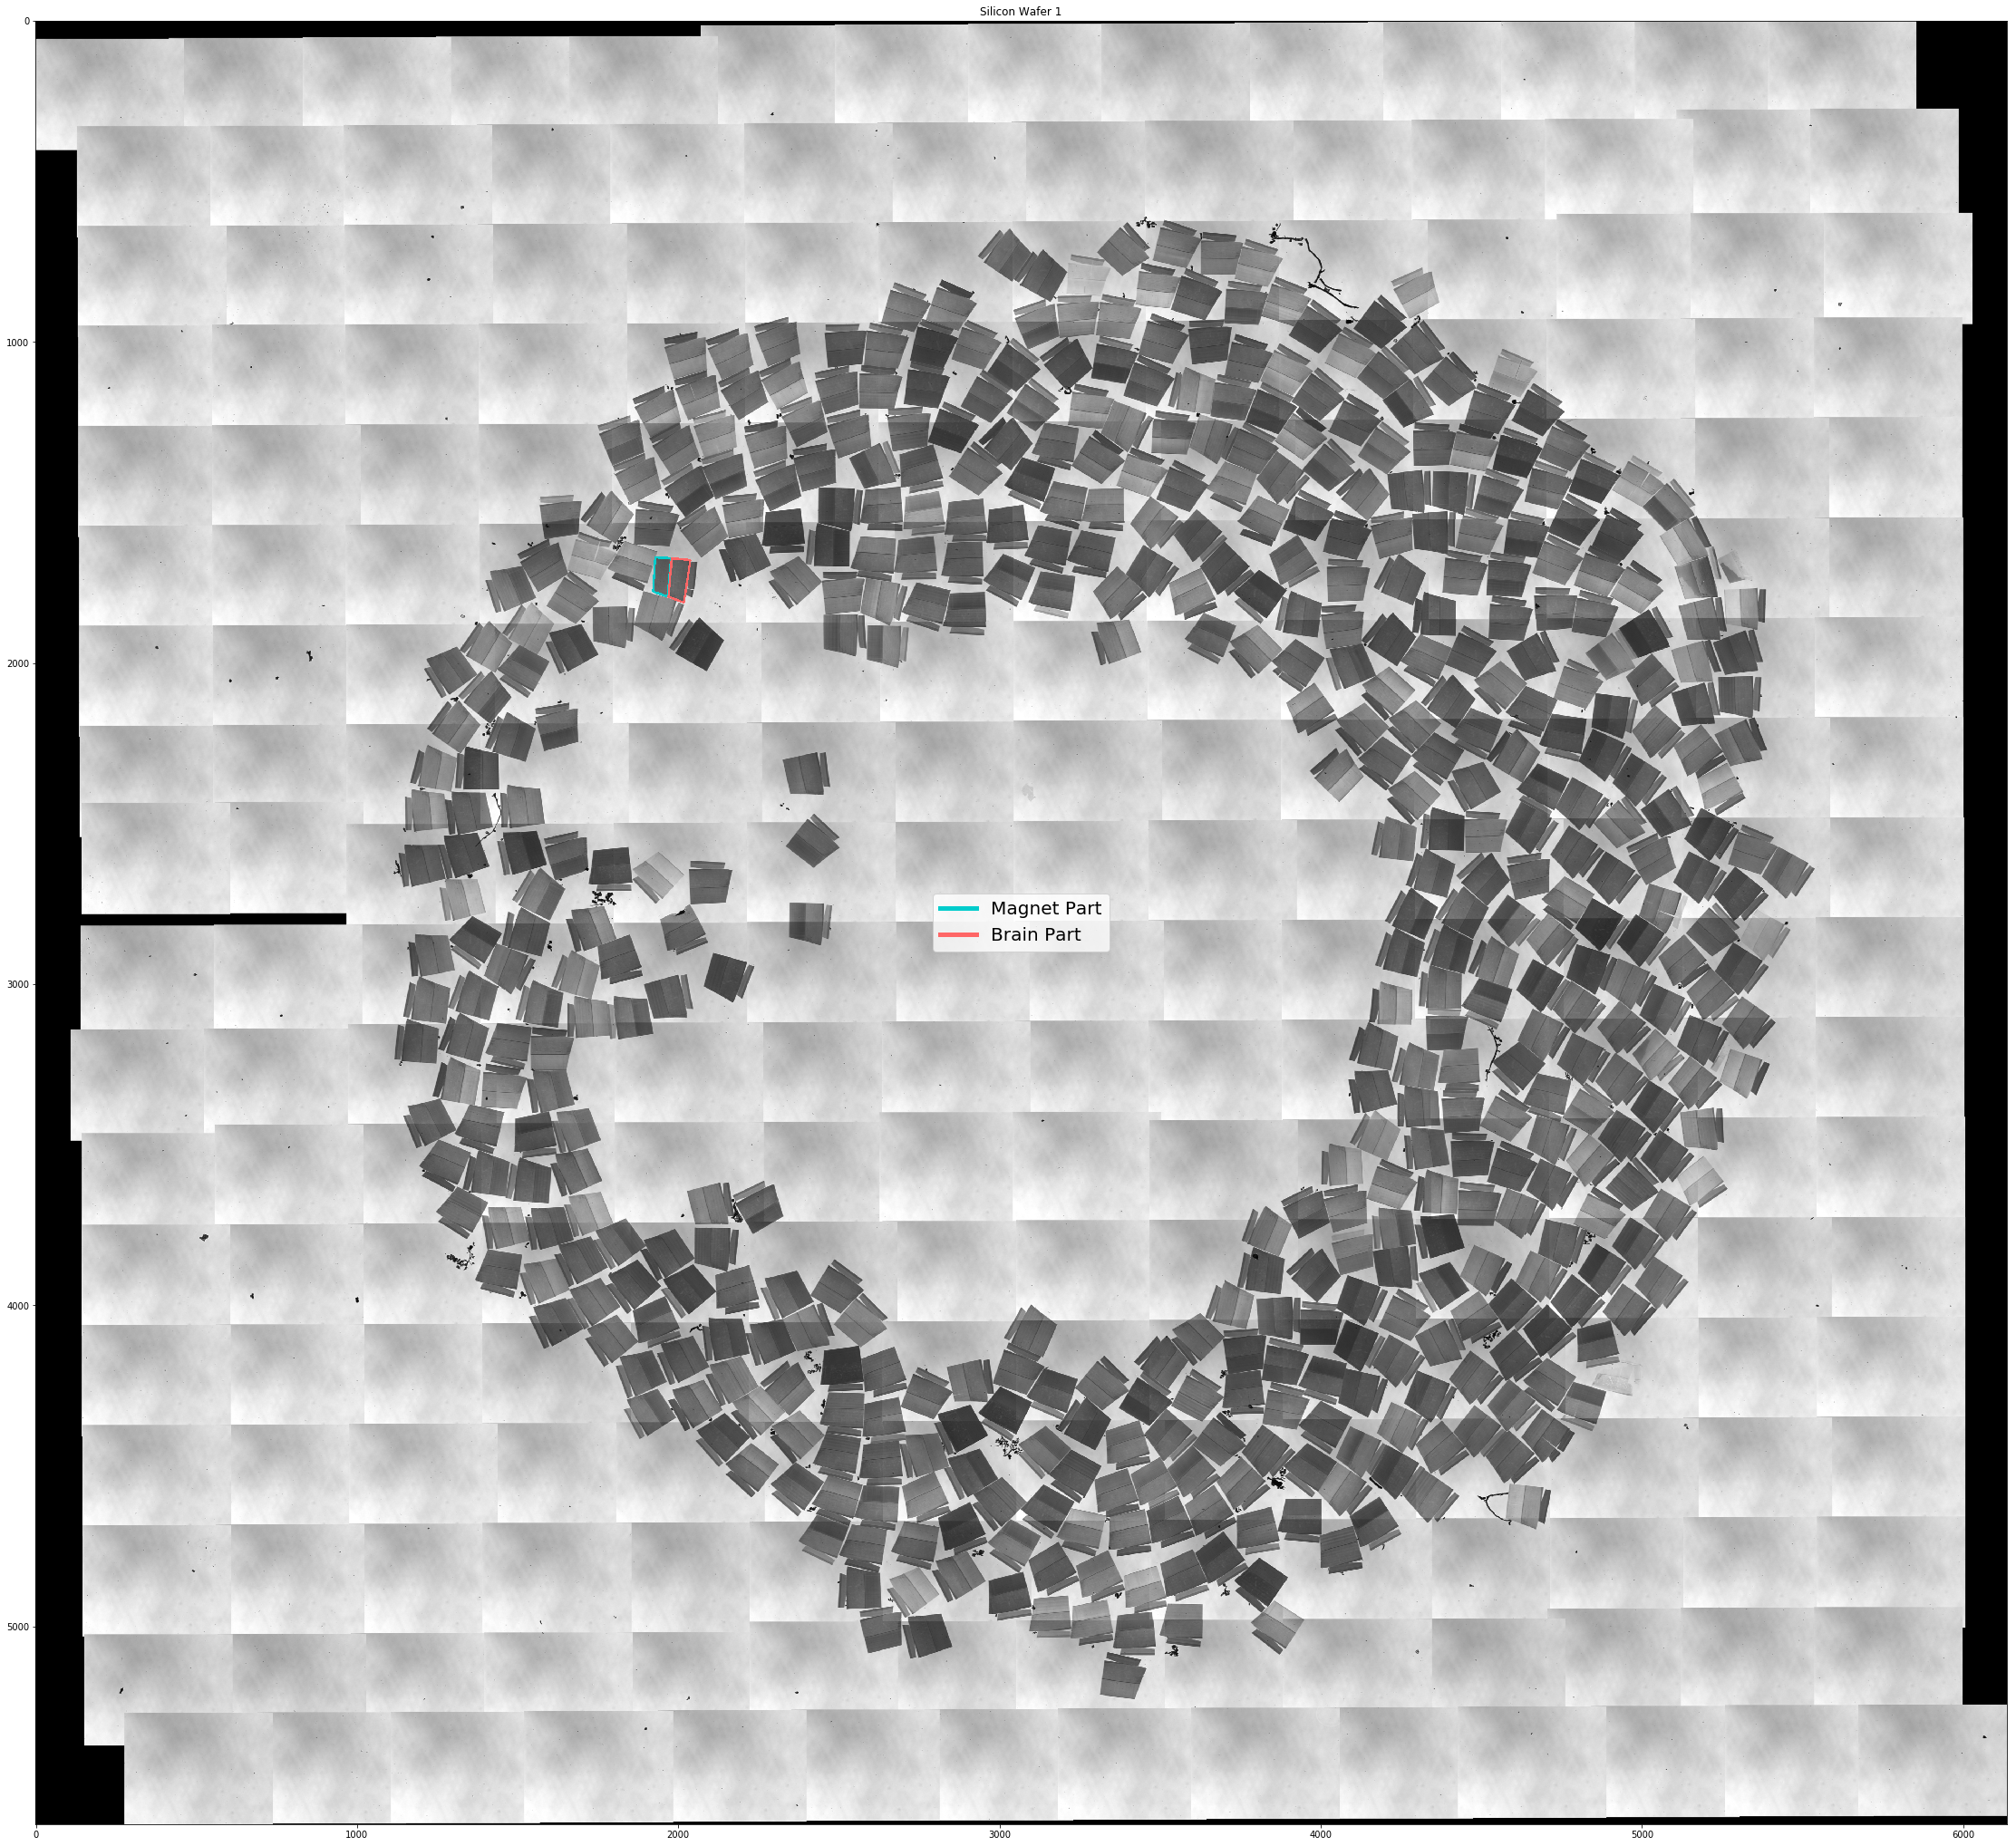

In [96]:
plt.figure(figsize=(40, 36.61))
plt.imshow(wafer_1)

plt.title('Silicon Wafer 1')

legend_elements = [Line2D([0], [0], color=magnet_color, lw=thickness, label='Magnet Part'),
                   Line2D([0], [0], color=tissue_color, lw=thickness, label='Brain Part')]
plt.legend(handles=legend_elements, loc='center', fontsize=20)

plt.show()